In [1]:
import pandas as pd
import numpy as np

from pipeline import vector_comparison

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, jaccard_score, accuracy_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('data/training.csv', index_col = 0)
df = df.iloc[:10000] #need to limit rows while running on local machine.


testing = pd.read_csv('data/testing.csv', index_col = 0)


In [3]:
#standard model flow.
#obstatiate model object
model1 = vector_comparison(df)

#split the data into train and test portions
train, test = model1.split_data(['question1','question2'],'is_duplicate')

#fit all the training data to td-idf, default settings for this model
model1.fit_tfidf()

#transform test questions into two vectors
q1 = model1.transform_tfidf(model1.X_test['question1'])
q2 = model1.transform_tfidf(model1.X_test['question2'])

#calculates the cosine similarity results
results = model1.compute_cosine_similarity(q1,q2)

#appends y_pred to df for validation
model1.return_df_w_results(results)

#calculates model preformance statistics
model1.compute_confusion_matrix()
thresh, TPR1, FPR1 = model1.draw_roc()

model1.model_report()

94   141
842   1423


' TP:94, FP: 141, FN:842, TN: 1423 TPR: 0.10042735042735043, FPR: 0.909846547314578, Accuracy: 0.6068, Precison: 0.4'

In [4]:
#standard flow
model2 = vector_comparison(df)

train, test = model2.split_data(['question1','question2'],'is_duplicate')
model2.fit_tfidf(stopwords = 'english')
q1_model2 = model2.transform_tfidf(model2.X_test['question1'])
q2_model2 = model2.transform_tfidf(model2.X_test['question2'])
results_2 = model2.compute_cosine_similarity(q1_model2,q2_model2)
model2.return_df_w_results(results_2)
model2.compute_confusion_matrix()
thresh, TPR2, FPR2 = model2.draw_roc()
model2.model_report()

94   141
842   1423


' TP:94, FP: 141, FN:842, TN: 1423 TPR: 0.10042735042735043, FPR: 0.909846547314578, Accuracy: 0.6068, Precison: 0.4'

In [5]:
### standard flow
model3 = vector_comparison(df)

train, test = model3.split_data(['question1','question2'],'is_duplicate')
model3.fit_tfidf(ngram_range=(1,2))
q1_model3 = model3.transform_tfidf(model3.X_test['question1'])
q2_model3 = model3.transform_tfidf(model3.X_test['question2'])
results_3 = model3.compute_cosine_similarity(q1_model3,q2_model3)
model3.return_df_w_results(results_3)
model3.compute_confusion_matrix()
thresh, TPR3, FPR3 = model3.draw_roc()
model3.model_report()

186   197
750   1367


' TP:186, FP: 197, FN:750, TN: 1367 TPR: 0.1987179487179487, FPR: 0.8740409207161125, Accuracy: 0.6212, Precison: 0.4856396866840731'

In [6]:
model4 = vector_comparison(df)

train, test = model4.split_data(['question1','question2'],'is_duplicate')
model4.fit_tfidf(ngram_range=(1,2), max_df = 0.5)
q1_model4 = model4.transform_tfidf(model4.X_test['question1'])
q2_model4 = model4.transform_tfidf(model4.X_test['question2'])
results_4 = model4.compute_cosine_similarity(q1_model4,q2_model4)
model4.return_df_w_results(results_4)
model4.compute_confusion_matrix()
thresh, TPR4, FPR4 = model4.draw_roc()
model4.model_report()

242   257
694   1307


' TP:242, FP: 257, FN:694, TN: 1307 TPR: 0.25854700854700857, FPR: 0.8356777493606138, Accuracy: 0.6196, Precison: 0.4849699398797595'

In [7]:
model5 = vector_comparison(df)

train, test = model5.split_data(['question1','question2'],'is_duplicate')
model5.fit_tfidf(stopwords = 'english', ngram_range=(1,2), max_df = 0.5, min_df = 2, max_features = 8000)
q1_model5 = model5.transform_tfidf(model5.X_test['question1'])
q2_model5 = model5.transform_tfidf(model5.X_test['question2'])
results_5 = model5.compute_cosine_similarity(q1_model5,q2_model5)
model5.return_df_w_results(results_5)
model5.compute_confusion_matrix()
thresh, TPR5, FPR5 = model5.draw_roc()
model5.model_report()

494   429
442   1135


' TP:494, FP: 429, FN:442, TN: 1135 TPR: 0.5277777777777778, FPR: 0.7257033248081841, Accuracy: 0.6516, Precison: 0.5352112676056338'

In [8]:
#model 6 is model5 with PCA1000
model6 =vector_comparison(df)

#standard flow
train, test = model6.split_data(['question1','question2'],'is_duplicate')
model6.fit_tfidf(stopwords = 'english', ngram_range=(1,2), max_df = 0.5, min_df = 2, max_features = 8000)
q1_model6 = model6.transform_tfidf(model6.X_test['question1'])
q2_model6 = model6.transform_tfidf(model6.X_test['question2'])

#add pca to the mix
model6.fit_pca(1000)
q1_model6 = model6.transform_pca(q1_model6)
q2_model6= model6.transform_pca(q2_model6)

#standard flow
results_6 = model6.compute_cosine_similarity(q1_model6,q2_model6)
model6.return_df_w_results(results_6)
model6.compute_confusion_matrix()
thresh, TPR6, FPR6 = model6.draw_roc()
model6.model_report()

641   501
295   1063


' TP:641, FP: 501, FN:295, TN: 1063 TPR: 0.6848290598290598, FPR: 0.6796675191815856, Accuracy: 0.6816, Precison: 0.5612959719789843'

In [9]:
#validate best model with testing data


model6.df = testing #change the data frame to the testing data.
train, test = model6.split_data(['question1','question2'],'is_duplicate', test = True)
q1_model6 = model6.transform_tfidf(model6.df['question1'])
q2_model6 = model6.transform_tfidf(model6.df['question2'])
model6.compute_confusion_matrix()
thresh, TPR6v, FPR6v = model6.draw_roc()
model6.model_report()

641   501
295   1063


' TP:641, FP: 501, FN:295, TN: 1063 TPR: 0.6848290598290598, FPR: 0.6796675191815856, Accuracy: 0.6816, Precison: 0.5612959719789843'

In [10]:
#model7 is model5 with countvectorization instead of tfidf vectorization 


model7 =vector_comparison(df)

#standard flow
train, test = model7.split_data(['question1','question2'],'is_duplicate')

#swap count vectorization for tfidf vectorization
model7.fit_count(stopwords = 'english', ngram_range=(1,2), max_df = 0.5, min_df = 2, max_features = 8000)
q1_model7 = model7.transform_count(test['question1'])
q2_model7 = model7.transform_count(test['question2'])

#add pca to the mix
model7.fit_pca(1000)
q1_model7 = model7.transform_pca(q1_model7)
q2_model7 = model7.transform_pca(q2_model7)

#standard flow
results_7 = model7.compute_cosine_similarity(q1_model7,q2_model7)
model7.return_df_w_results(results_7)
model7.compute_confusion_matrix()
thresh, TPR7, FPR7 = model7.draw_roc()
model7.model_report()


599   514
337   1050


' TP:599, FP: 514, FN:337, TN: 1050 TPR: 0.6399572649572649, FPR: 0.6713554987212276, Accuracy: 0.6596, Precison: 0.5381850853548967'

In [11]:
#model8 is model5 with count vectorization instead of TFIDF and jaccard distance instead of cosine simmilarity.

model8 =vector_comparison(df)

#standard flow
train, test = model8.split_data(['question1','question2'],'is_duplicate')

#swap count vectorization for tfidf vectorization
model8.fit_count(stopwords = 'english', ngram_range=(1,2), max_df = 0.5, min_df = 2, max_features = 8000)
q1_model8 = model8.transform_count(test['question1'])
q2_model8 = model8.transform_count(test['question2'])

#swap jaccard similarity for cosine similarity
results_8 = model8.compute_jaccard_similarity(q1_model8,q2_model8, average = 'macro')

#standard flow
model8.return_df_w_results(results_8)
model8.compute_confusion_matrix()
thresh, TPR8, FPR8 = model8.draw_roc()
model8.model_report()


704   614
232   950


' TP:704, FP: 614, FN:232, TN: 950 TPR: 0.7521367521367521, FPR: 0.6074168797953964, Accuracy: 0.6616, Precison: 0.5341426403641881'

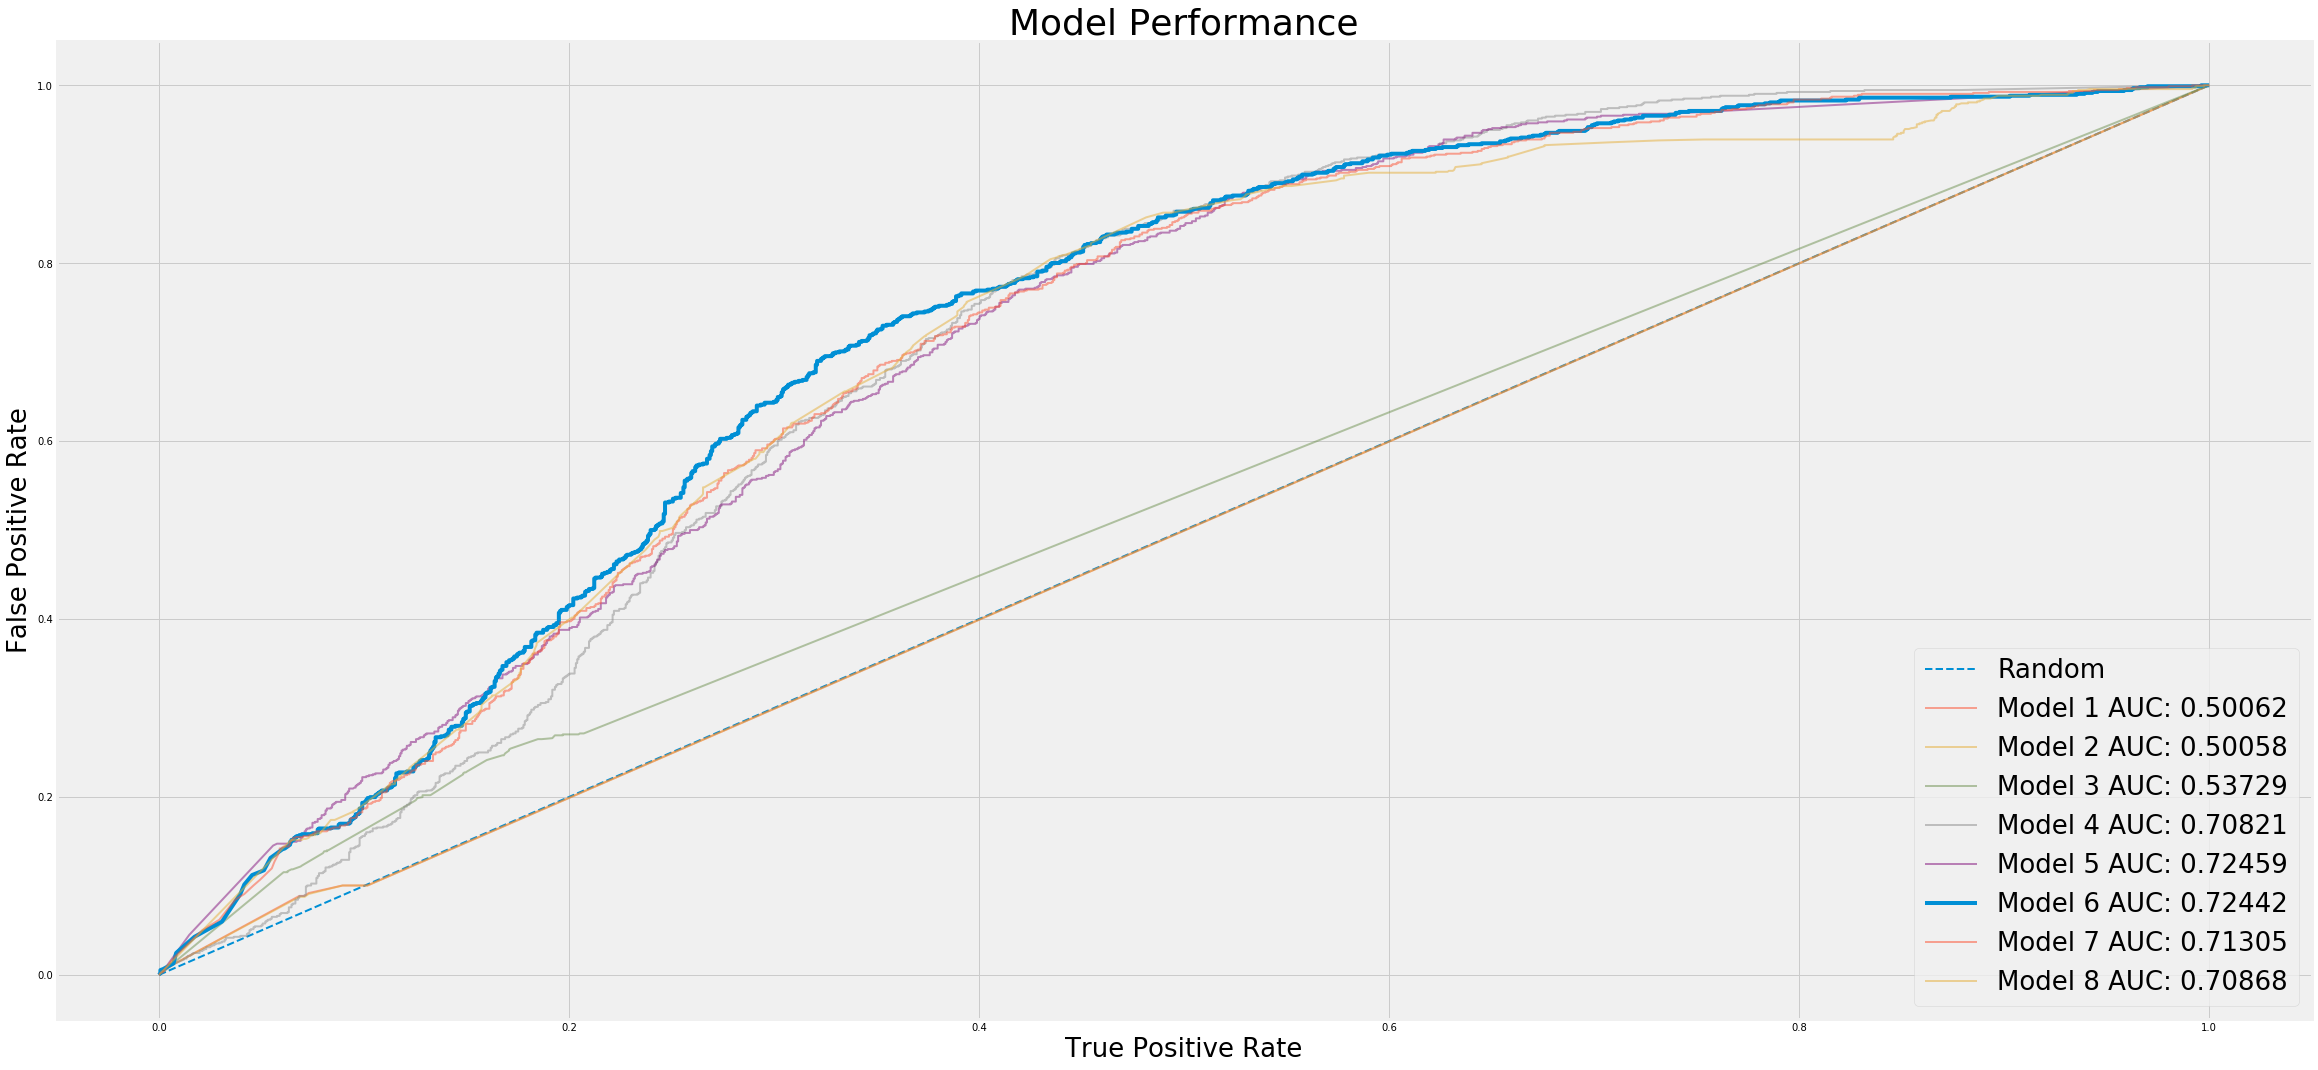

In [12]:
fig, ax = plt.subplots(figsize=(36,18))

ax.plot([0,1], label = 'Random', linestyle='dashed', linewidth = 2)
ax.plot(FPR2,TPR2, label = f'Model 1 AUC: {model2.roc_auc_score}',linewidth=2, alpha = 0.5)
ax.plot(FPR1,TPR1, label = f'Model 2 AUC: {model1.roc_auc_score}',linewidth=2, alpha = 0.5)
ax.plot(FPR3,TPR3, label = f'Model 3 AUC: {model3.roc_auc_score}',linewidth=2, alpha = 0.5)
ax.plot(FPR4,TPR4, label = f'Model 4 AUC: {model4.roc_auc_score}',linewidth=2, alpha = 0.5)
ax.plot(FPR5,TPR5, label = f'Model 5 AUC: 0.72459',linewidth=2, alpha = 0.5)
ax.plot(FPR6,TPR6, label = f'Model 6 AUC: {model6.roc_auc_score}',linewidth=4)

#ax.plot(FPR6v,TPR6v, label = f'Model 6 TEST data AUC: {model6.roc_auc_score}',linewidth=4)
ax.plot(FPR7,TPR7, label = f'Model 7 AUC: {model7.roc_auc_score}',linewidth=2, alpha = 0.5)
ax.plot(FPR8,TPR8, label = f'Model 8 AUC: {model8.roc_auc_score}',linewidth=2, alpha = 0.5)

plt.xlabel('True Positive Rate', fontsize=26)
plt.ylabel('False Positive Rate', fontsize=26)
#ax.get_yaxis().set_visible(False)
#ax.get_xaxis().set_visible(False)

plt.legend(loc="lower right", fontsize=26)
plt.title("Model Performance", fontsize=36)


#plt.savefig('SRC/ModelPreformance.png', transparent=True)

In [13]:


#model6.final.to_csv('data/model6.csv')

In [22]:
#Lets try classification with Gradient Boosting Classifier

from sklearn.ensemble import RandomForestRegressor

In [23]:
model9 = vector_comparison(df)
#standard flow, hyperparametres from model5
train, test = model9.split_data(['question1','question2'],'is_duplicate')
model9.fit_tfidf(stopwords = 'english', ngram_range=(1,2), max_df = 0.5,
                 min_df = 2, max_features = 8000)

q1_model9 = model9.transform_tfidf(model9.X_train['question1'])
q2_model9 = model9.transform_tfidf(model9.X_train['question2'])

results_9 = model9.compute_cosine_similarity(q1_model9,q2_model9)
#model9.return_df_w_results(results_9)
model9.compute_confusion_matrix()
thresh, TPR9, FPR9 = model9.draw_roc()
model9.model_report()

AttributeError: 'vector_comparison' object has no attribute 'final'